<a href="https://colab.research.google.com/github/crystalloide/Notebooks-SQL-serie-1/blob/main/ex12_Bonus_interactions_avec_Panda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ex12-Bonus: interactions avec Panda

Dans les notebooks précédents, nous avons mis en pratique la syntaxe SQL de base avec sql% (SQL magic), tout comme l'utilisation d'un outil de ligne de commande. 

En fait, SQL magic a une belle intégration avec la bibliothèque pandas. 

Le résultat de la requête SQL peut être converti en trame de données pandas standard via un appel DataFrame. 

Après avoir récupéré des données dans un Pandas DataFrame, nous pouvons effectuer une analyse de données plus exploratoire. 

Cependant, c'est une autre histoire qui dépasse la portée de SQL lui-même.


In [1]:
%load_ext sql

### 1. Chargement des libraries nécessaires

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline

In [3]:
from google.colab import drive
# drive.mount('/content/gdrive')
drive.mount("/content/gdrive", force_remount=True)


Mounted at /content/gdrive


### 2. Lecture de la table rch dans la database demo.db3

#### 2.1 Connection à la database demo.db3

In [4]:
%sql sqlite:////content/gdrive/MyDrive/Partage/Notebooks_Serie_1/demo.db3

'Connected: @/content/gdrive/MyDrive/Partage/Notebooks_Serie_1/demo.db3'

#### 2.2 Sauvegarde de la requête dans une variable

In [5]:
%%sql sqlres << 
SELECT RCH, YR, MO, FLOW_OUTcms 
FROM rch

 * sqlite:////content/gdrive/MyDrive/Partage/Notebooks_Serie_1/demo.db3
Done.
Returning data to local variable sqlres


#### 2.3 Constitution du dataframe à partir des résultats de la requête

In [6]:
df = sqlres.DataFrame()
df.head()

,RCH,YR,MO,FLOW_OUTcms
0,1,1981,1,146.252487
1,2,1981,1,96.182854
2,3,1981,1,11.861368
3,4,1981,1,49.406513
4,5,1981,1,272.106018


### 3. Traitements complémentaires avec Pandas

#### 3.1 Définition customisée des trimestres :

In [7]:
quarters = {1: 'DJF', 2: 'DJF', 3: 'MAM', 4: 'MAM', 5: 'MAM', 6: 'JJA',
            7: 'JJA', 8: 'JJA', 9: 'SON', 10: 'SON', 11: 'SON', 12: 'DJF'}

#### 3.2 Gestion des statistiques saisonnières pour chaque entrée REACH (RCH)

In [8]:
df = df.set_index(['MO'])
ssndf = df.groupby(['RCH',quarters])['FLOW_OUTcms'].mean()
ssndf.head(5)

RCH     
1    DJF      99.204991
     JJA    1405.262298
     MAM     559.746932
     SON     454.737985
2    DJF      56.328539
Name: FLOW_OUTcms, dtype: float64

#### Reset de l'index

In [9]:
ssndf = ssndf.reset_index()
ssndf.set_index(['RCH'])
ssndf.head(5)

,RCH,level_1,FLOW_OUTcms
0,1,DJF,99.204991
1,1,JJA,1405.262298
2,1,MAM,559.746932
3,1,SON,454.737985
4,2,DJF,56.328539


In [10]:
ssndf = ssndf.rename(index=str, columns={"level_1":"SSN"})
ssndf.head(5)

,RCH,SSN,FLOW_OUTcms
0,1,DJF,99.204991
1,1,JJA,1405.262298
2,1,MAM,559.746932
3,1,SON,454.737985
4,2,DJF,56.328539


#### Convertion des données en une table à pivot

In [11]:
pivoted = ssndf.pivot(index='RCH', columns='SSN', values='FLOW_OUTcms')
pivoted.head()

SSN,DJF,JJA,MAM,SON
RCH,,,,
1,99.204991,1405.262298,559.746932,454.737985
2,56.328539,773.664280,203.242828,297.934326
3,32.838328,166.310382,379.771358,27.425488
4,28.384519,619.184517,278.996801,155.766145
5,336.824441,1635.518864,1215.423962,499.265579


### 4. Visualisation :
Précisons certains paramètres pour rendre la représentation plus attrayante

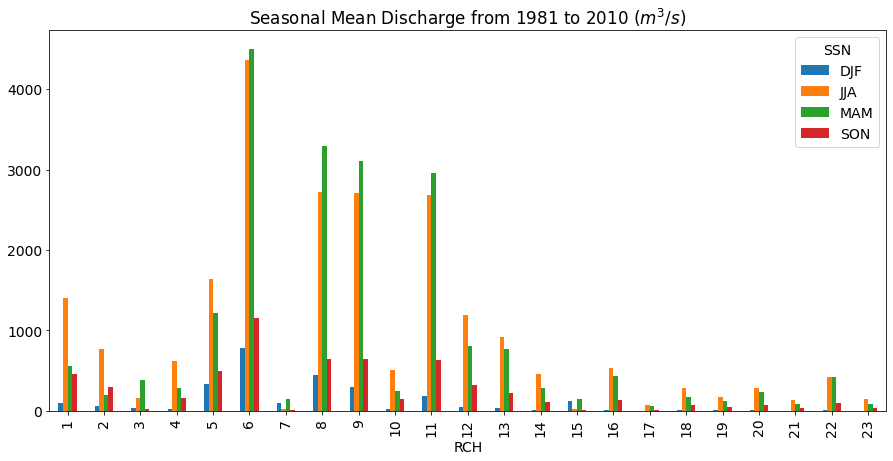

In [12]:
# Plot size to 15" x 7"
matplotlib.rc('figure', figsize = (15, 7))
# Font size to 14
matplotlib.rc('font', size = 14)
# Display top and right frame lines
matplotlib.rc('axes.spines', top = True, right = True)
# Remove grid lines
matplotlib.rc('axes', grid = False)
# Set backgound color to white
matplotlib.rc('axes', facecolor = 'white')

pivoted.plot(kind='bar', title='Seasonal Mean Discharge from 1981 to 2010 ($m^3/s$)')

### Conclusion

Dans ce Notebook, nous avons vu à quel point il est facile de lier les opérations d'une base de données SQLite à Pandas via sql%. 

De plus, nous utilisons des outils Python tels que Pandas pour effectuer une analyse plus approfondie des données récupérées.